In [14]:
from model import NucleationGrowthModel, solve_agg, solve_nuc_gr_agg #these are the nucleation and growth model as well as the part dealing with aggegation
from rsc.utils import read_config, save_results ##read config is for getting the start parameters from a .toml file save result exports the results
from plots import plot_defaults, time_vs_concentration, time_vs_saturation, number_vs_size, number_vs_size_scatter, time_vs_variance, create_basic_plot, ctwinx, create_dual_plot, gather_legend
from rsc import read_results


import numpy as np
from glob import glob



def get_size(df):
    # Select columns corresponding to particle size R and number of particles P
    R_col = df.columns[df.columns.str.startswith('R')]
    P_col = df.columns[df.columns.str.startswith('P')]
    # Convert particle size to nanometers and extract data as numpy arrays
    R = df[R_col].to_numpy() * 1e9
    P = df[P_col].to_numpy()
    # Only include rows where there are non-zero number of particles
    cnd = P.sum(axis=1) > 0
    R = R[cnd]
    P = P[cnd]
    # Extract time values for plotting
    t = df.t[cnd]
    # Calculate weighted variance of particle size distribution
    weighted_avg = np.average(R, axis=1, weights=P)
    return t, weighted_avg

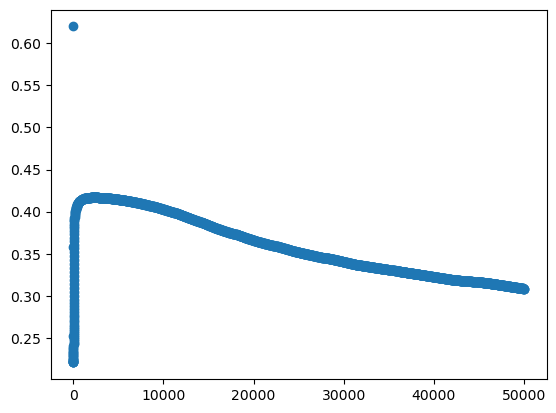

In [15]:
import matplotlib.pyplot as plt
a,b=get_size(df)
plt.scatter(a,b)